In [181]:
import time
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from PIL import Image
from scipy import ndimage
from dnn_app_utils_v2 import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (5.0, 4.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

#np.random.seed(1)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [183]:
train_x_orig, train_y, test_x_orig, test_y, classes = load_data()

In [185]:
index = 2
plt.imshow(train_x_orig[index])
print("y = " + str(train_y[0, index]) + ".Its a " + classes[train_y[0 , index]].decode("utf-8") + " picture")

y = 1.Its a cat picture


In [187]:
m_train = train_x_orig.shape[0]
num_px = train_x_orig.shape[1]
m_test = test_x_orig.shape[0]

print("No of training examples are: ", m_train)
print("No of testing examples are: ", m_test)
print("Each Image is of size: "  , num_px, num_px, "3")
print("Train_x_orig Shape" + str(train_x_orig.shape))
print("Train_y" + str(train_y.shape))
print("Test_x_orig Shape" + str(test_x_orig.shape))
print("Test_y Shape" + str(test_y.shape))

No of training examples are:  209
No of testing examples are:  50
Each Image is of size:  64 64 3
Train_x_orig Shape(209, 64, 64, 3)
Train_y(1, 209)
Test_x_orig Shape(50, 64, 64, 3)
Test_y Shape(1, 50)


In [189]:
train_x_flatten = train_x_orig.reshape(train_x_orig.shape[0], -1).T
test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0],-1).T

train_x = train_x_flatten/255
test_x = test_x_flatten/255

print(train_x_flatten.shape)
print(test_x_flatten.shape)

(12288, 209)
(12288, 50)


***Architecture of Model Now***

**Two Layer NN**

In [193]:
n_x = train_x_flatten.shape[0]
n_h= 7 
n_y= 1
layer_dims= (n_x, n_h, n_y)

In [200]:
def two_layer_model(X,Y, layer_dims, learning_rate= 0.0075, num_iterations= 3000, print_cost= False):

    np.random.seed(1)
    grads= {}
    costs = []
    m= X.shape[1]
    (n_x, n_h, n_y) = layer_dims

    parameters= initialize_parameters(n_x, n_h, n_y)

    W1= parameters["W1"]
    b1= parameters["b1"]
    W2= parameters["W2"]
    b2= parameters["b2"]

    for i in range(0 , num_iterations):
        A1, cache1 = linear_activation_forward(X, W1, b1, 'relu')
        A2, cache2 = linear_activation_forward(A1, W2, b2, 'sigmoid')

        cost = compute_cost(A2, Y)

        dA2 = - (np.divide(Y, A2) - np.divide(1- Y, 1-A2) )

        dA1, dW2, db2 = linear_activation_backward(dA2, cache2, 'sigmoid')
        dA0, dW1, db1 =  linear_activation_backward(dA1, cache1, 'relu')

        grads['dW1'] = dW1
        grads['db1'] = db1
        grads['dW2'] = dW2
        grads['db2'] = db2


        parameters = update_parameters(parameters, grads, learning_rate)

        W1= parameters["W1"]
        b1= parameters["b1"]
        W2= parameters["W2"]
        b2= parameters["b2"]
        
        if print_cost and i%100 ==0:
            print("Cost after every iteration {}: {} ".format(i, np.squeeze(cost)))
        if print_cost and i %100 == 0:
            costs.append(cost)
    plt.clf()
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per 100s)')
    plt.title("Learning Rate= " + str(learning_rate))
    plt.show()
    return parameters


Cost after every iteration 0: 0.6930497356599888 
Cost after every iteration 100: 0.6464320953428849 
Cost after every iteration 200: 0.6325140647912677 
Cost after every iteration 300: 0.6015024920354665 
Cost after every iteration 400: 0.5601966311605748 
Cost after every iteration 500: 0.5158304772764729 
Cost after every iteration 600: 0.47549013139433255 
Cost after every iteration 700: 0.4339163151225749 
Cost after every iteration 800: 0.400797753620389 
Cost after every iteration 900: 0.3580705011323798 
Cost after every iteration 1000: 0.3394281538366412 
Cost after every iteration 1100: 0.3052753636196263 
Cost after every iteration 1200: 0.27491377282130197 
Cost after every iteration 1300: 0.24681768210614846 
Cost after every iteration 1400: 0.19850735037466088 
Cost after every iteration 1500: 0.17448318112556663 
Cost after every iteration 1600: 0.17080762978096237 
Cost after every iteration 1700: 0.11306524562164721 
Cost after every iteration 1800: 0.09629426845937147

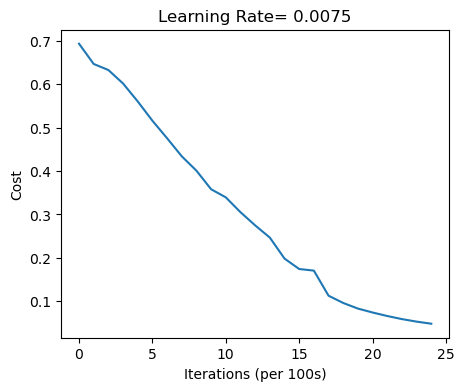

In [202]:
parameters = two_layer_model(train_x, train_y, layer_dims= (n_x, n_h, n_y), num_iterations= 2500, print_cost= True  )

In [212]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.9999999999999998


In [243]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.8899521531100477


In [216]:
pred_test= predict(test_x, test_y, parameters)

Accuracy: 0.72


**L-Layer NN**

In [233]:
def L_layer_model(X, Y, layer_dims, learning_rate= 0.075, num_iterations= 3000, print_cost= False):

    np.random.seed(1)
    costs = []

    parameters = initialize_parameters_deep(layer_dims)

    for i in range(0, num_iterations):

        AL, caches = L_model_forward(X, parameters)

        cost = compute_cost(AL, Y)

        grads = L_model_backward(AL, Y, caches)

        parameters = update_parameters(parameters, grads, learning_rate)
        
        if print_cost and i%100 == 0:
            print("Cost after every 100 Iteration %i: %f" %(i, cost))
        if print_cost and i%100 == 0:
            costs.append(cost)

    plt.clf()
    plt.plot(np.squeeze(costs))
    plt.ylabel('Cost')
    plt.xlabel('Iterations (per 100s)')
    plt.title("Learning Rate= " + str(learning_rate))
    plt.show()
    return parameters

Cost after every 100 Iteration 0: 0.695046
Cost after every 100 Iteration 100: 0.576272
Cost after every 100 Iteration 200: 0.601729
Cost after every 100 Iteration 300: 0.570167
Cost after every 100 Iteration 400: 0.569466
Cost after every 100 Iteration 500: 0.538526
Cost after every 100 Iteration 600: 0.672302
Cost after every 100 Iteration 700: 0.459273
Cost after every 100 Iteration 800: 0.474537
Cost after every 100 Iteration 900: 0.524969
Cost after every 100 Iteration 1000: 0.658312
Cost after every 100 Iteration 1100: 0.487615
Cost after every 100 Iteration 1200: 0.350722
Cost after every 100 Iteration 1300: 0.294419
Cost after every 100 Iteration 1400: 0.387912
Cost after every 100 Iteration 1500: 0.305151
Cost after every 100 Iteration 1600: 0.372043
Cost after every 100 Iteration 1700: 0.257901
Cost after every 100 Iteration 1800: 0.253731
Cost after every 100 Iteration 1900: 0.252428
Cost after every 100 Iteration 2000: 0.256633
Cost after every 100 Iteration 2100: 0.253270


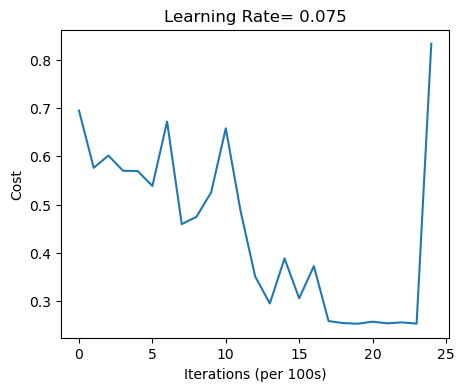

In [235]:
parameters = L_layer_model(train_x, train_y, layer_dims, num_iterations= 2500, print_cost= True)

In [247]:
pred_train = predict(train_x, train_y, parameters)

Accuracy: 0.8899521531100477


In [249]:
predict_test = predict(test_x, test_y, parameters)

Accuracy: 0.6200000000000001


In [259]:
plt.clf()
print_mislabeled_images(classes,test_x, test_y, pred_test)